<a href="https://colab.research.google.com/github/RostislavB74/NN_HW11/blob/main/HW_11_220324_2038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завантаження даних та їх вивчення

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Bidirectional
import numpy as np


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32
epochs=30

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
x_train = pad_sequences(input_train, maxlen=maxlen)
x_test = pad_sequences(input_test, maxlen=maxlen)

In [5]:
x_train.shape

(25000, 500)

In [6]:
x_test.shape

(25000, 500)

In [7]:
print(x_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '') for i in input_train[0] if (i - 3) in reverse_word_index])
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little boy's that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

In [10]:
def list_line_words(words_list, max_words=10):
    print("\nTotal words:", len(words_list))
    print("{:<10} {:<10} {}".format("Index", "Word Index", "Word"))
    print("-" * 35)
    n = 0
    for i, idx in enumerate(words_list):
        if isinstance(idx, int):
            if idx < 3:
                continue
            word = reverse_word_index.get(idx - 3, '')
            print(f"{word_indices[i]:<10} {idx:<10} {word}")
        else:
            print(f"{word_indices[i]:<10} {idx:<10}")
        n += 1
        if n > max_words:
            break

In [11]:
review_index = 1
label = y_train[review_index]
sentiment = "позитивний" if label == 1 else "негативний"

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
word_indices = [i - 3 for i in input_train[review_index] if i - 3 > 0]
decoded_review = [reverse_word_index.get(index, '') for index in word_indices]

print(f"Відгук №{review_index} - {sentiment}")
print("Список номерів слів:", word_indices)
print("Декодований відгук:", ' '.join(decoded_review))

list_line_words(decoded_review, max_words=14)

word_count = {}
for index, word in enumerate(decoded_review, start=1):
    if word:
        word_count[word] = word_count.get(word, 0) + 1

print("Кількість входжень кожного слова:")
print("{:<15} {:<10}".format("Слово", "Кількість"))
print("-" * 25)
total_count = 0
unique_words = 0
for word, count in word_count.items():
    print("{:<15} {:<10}".format(word, count))
    total_count += count
    unique_words += 1
print("-" * 25)
print("Загальна кількість унікальних слів:", unique_words)
print("Загальна кількість слів:", total_count)


Відгук №1 - негативний
Список номерів слів: [191, 1150, 191, 8252, 75, 225, 2, 3, 1460, 4366, 5009, 131, 23, 1, 712, 5, 115, 1631, 11, 391, 17, 10, 116, 951, 186, 99, 2, 204, 107, 3100, 18, 11, 66, 185, 5, 27, 20, 4, 1, 246, 123, 90, 1, 111, 6, 2297, 1520, 2, 644, 1, 113, 6, 32, 8160, 1, 226, 6, 337, 1319, 1, 115, 6, 1, 127, 4898, 16, 1, 999, 2, 86, 26, 949, 43, 34, 1, 452, 6, 42, 40, 35, 1540, 1902, 395, 1, 1646, 23, 6850, 2, 160, 8, 3212, 1, 1150, 6, 191, 772, 4, 8252, 346, 2634, 145, 602, 8000, 12, 120, 122, 65, 6850, 12, 346, 162, 4359, 95, 2, 1, 225, 6, 40, 1154, 12, 296, 117, 2, 117, 171, 8, 217, 172, 133, 47, 6, 4370, 225, 8252, 2, 653, 242, 2347, 2, 1, 9834, 128, 149, 488, 15, 29, 7461, 1209, 11, 6, 3, 368, 75, 19, 622, 61, 1379, 6, 5, 165, 142, 20, 1, 1687, 12, 13, 1, 1352, 2, 25, 3, 49, 151, 459, 30, 86, 75, 282, 13, 142, 92]
Декодований відгук: big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror mo

# Підготовка

In [12]:
batch_size = 512
learning_rate = 0.001
ignore_saved_model = False
upload_saved_model = True
every_model_zip = True
use_test_for_validate = False
tensorboard_path = "tensorboard"
tensorboard_logs = "logs"

In [13]:
def evaluate_model(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    results = {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    }
    return results

In [14]:
validation_split = 0.0
validation_data = None

if use_test_for_validate:
  validation_data = (x_test, y_test)
else:
  validation_split = 0.3

In [15]:
import os
import pickle

def save_models_history_results(models, histories, results, model_name, base_dir='./'):
    models_filename = base_dir + model_name + '_models.pkl'
    history_filename = base_dir + model_name + '_history.pkl'
    results_filename = base_dir + model_name + '_results.pkl'

    if os.path.exists(models_filename):
        print(f"Файл моделей {models_filename} вже існує. Перезаписуємо.")
    if os.path.exists(history_filename):
        print(f"Файл історії {history_filename} вже існує. Перезаписуємо.")
    if os.path.exists(results_filename):
        print(f"Файл результатів {results_filename} вже існує. Перезаписуємо.")

    with open(models_filename, 'wb') as f:
        pickle.dump(models, f)

    with open(history_filename, 'wb') as f:
        pickle.dump(histories, f)

    with open(results_filename, 'wb') as f:
        pickle.dump(results, f)

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU
from keras.callbacks import EarlyStopping

def build_model(model_type):
    model = Sequential(name=model_type)
    model.add(Embedding(max_features, 32))

    if model_type == 'RNN':
        model.add(SimpleRNN(32))
    elif model_type == 'LSTM':
        model.add(LSTM(32))
    elif model_type == 'BRNN':
        model.add(Bidirectional(LSTM(32)))
    elif model_type == 'GRU':
        model.add(GRU(32))


    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model, model_type

def train_model(model, model_type, x_train, y_train, epochs=10, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    model.reset_states()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.3, callbacks=[early_stopping])
    results[model_type] = history.history
    model.save(f"{model_type}_model.h5")
    return history

In [17]:
models = {}
histories = {}
results = {}
model_types = ['RNN', 'GRU', 'LSTM', 'BRNN']

# Перший розділ

## RNN

In [18]:
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 30
model_type = 'RNN'
model, model_name = build_model(model_type)
history = train_model(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)

save_history(history, 'rnn_history.pkl')


Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
137/137 [==============================] - 76s 517ms/step - loss: 0.6315 - acc: 0.6289 - val_loss: 0.4595 - val_acc: 0.8099
Epoch 2/30
137/137 [==============================] - 73s 526ms/step - loss: 0.4059 - acc: 0.8253 - val_loss: 0.4303 - val_acc: 0.8083
Epoch 3/30
137/137 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 30s 39ms/step - loss: 0.3814 - acc: 0.8430


In [20]:
import os
import pickle

def load_history(model_name, base_dir='./'):
    history_filename = base_dir + model_name + '_history.pkl'

    if not os.path.exists(history_filename):
        print(f"Файл історії {history_filename} не існує.")
        return None

    with open(history_filename, 'rb') as f:
        history = pickle.load(f)
    return history

In [21]:
model_name = 'RNN'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [22]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні RNN')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації RNN')
    plt.title('Точність тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні RNN')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації RNN')
    plt.title('Втрати тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()





In [23]:
import pickle
from keras.callbacks import History

def load_history(model_name, base_dir='./'):
    history_filename = base_dir + model_name + '_history.pkl'

    if os.path.exists(history_filename):
        with open(history_filename, 'rb') as f:
            history_dict = pickle.load(f)
            history = History()
            history.history = history_dict
            return history
    else:
        return None

Історія завантажена успішно!


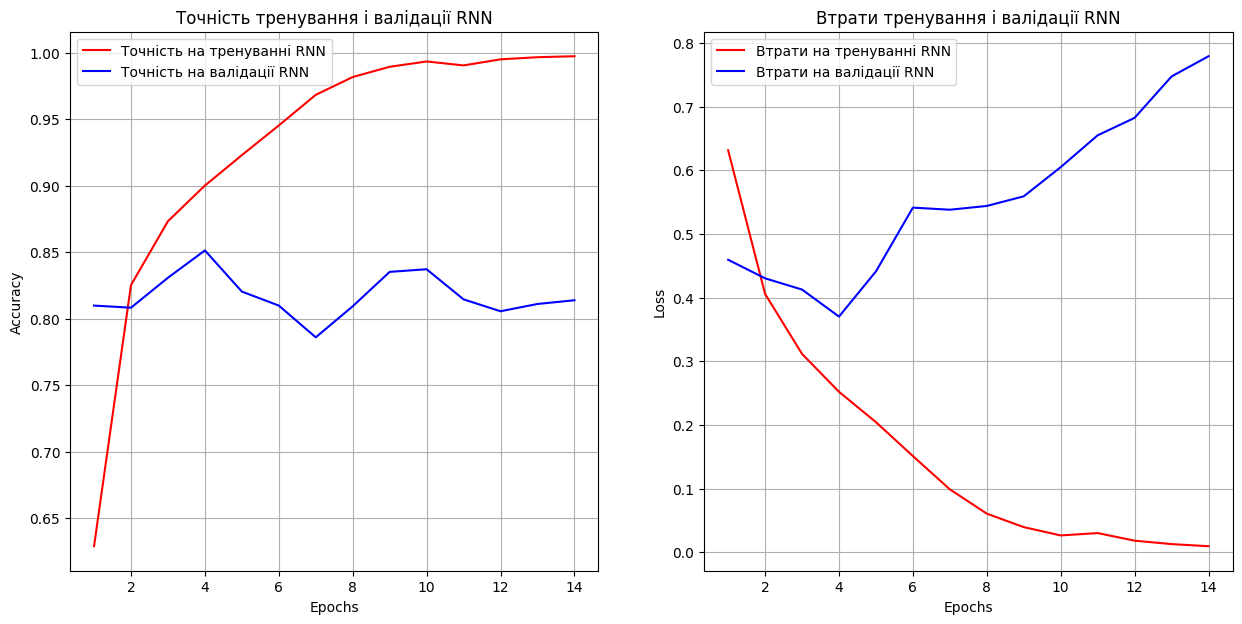

In [24]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")


In [25]:
def predict_and_evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

In [26]:
predict_and_evaluate(model, x_test, y_test)

782/782 [==============================] - 31s 40ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 30s 38ms/step - loss: 0.3814 - acc: 0.8430
Test Loss: 0.38135334849357605
Test Accuracy: 0.842960000038147


In [27]:
for i in range(3):
    print("Відгук:", x_test[i])
    print("Мітка (позитивний=1, негативний=0):", y_test[i])
    print()

Відгук: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    

## GRU

In [28]:
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 30
model_type = 'GRU'
model, model_name = build_model(model_type)
history = train_model(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle
def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)

save_history(history, 'gru_history.pkl')


Model: "GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
137/137 [==============================] - 14s 84ms/step - loss: 0.6444 - acc: 0.6203 - val_loss: 0.4527 - val_acc: 0.7921
Epoch 2/30
137/137 [==============================] - 10s 72ms/step - loss: 0.3862 - acc: 0.8303 - val_loss: 0.3938 - val_acc: 0.8303
Epoch 3/30
137/137 [===

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 6s 8ms/step - loss: 0.3222 - acc: 0.8648


In [29]:
model_name = 'GRU'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [30]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні GRU')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації GRU')
    plt.title('Точність тренування і валідації GRU')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні GRU')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації GRU')
    plt.title('Втрати тренування і валідації GRU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()


Історія завантажена успішно!


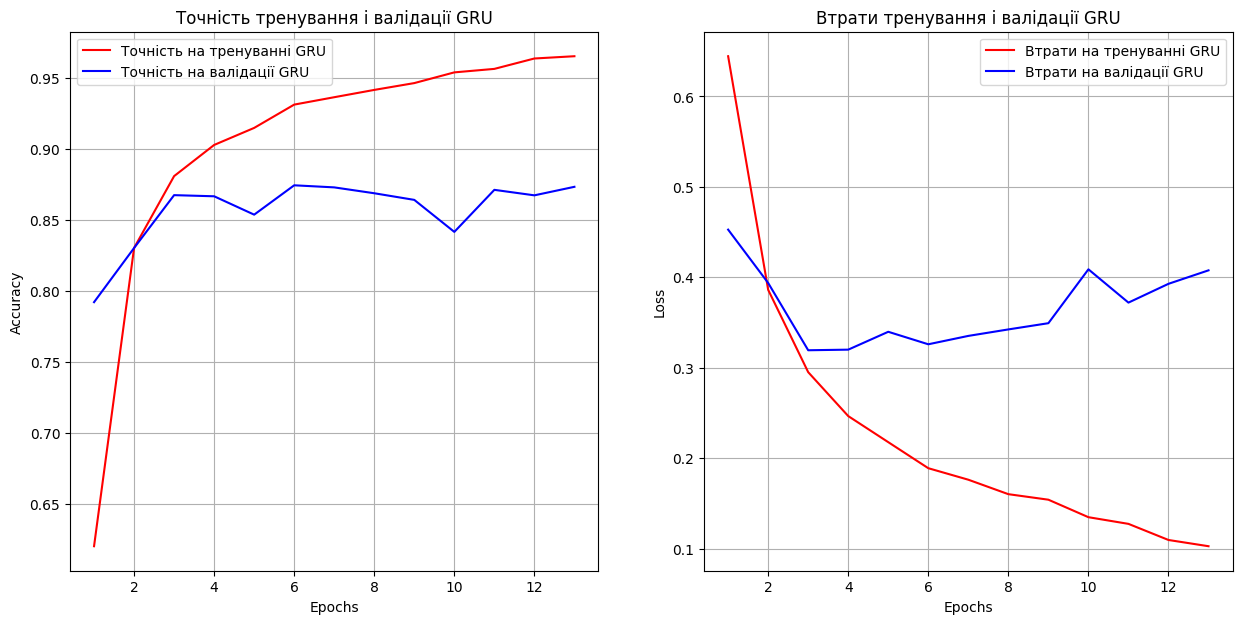

In [31]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [32]:
predict_and_evaluate(model, x_test, y_test)

782/782 [==============================] - 6s 8ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 7s 9ms/step - loss: 0.3222 - acc: 0.8648
Test Loss: 0.3222060203552246
Test Accuracy: 0.8647599816322327


## LSTM

In [33]:
import pickle
from keras.callbacks import History

def load_history(model_name, base_dir='./'):
    history_filename = base_dir + model_name + '_history.pkl'

    if os.path.exists(history_filename):
        with open(history_filename, 'rb') as f:
            history_dict = pickle.load(f)
            history = History()
            history.history = history_dict
            return history
    else:
        return None

In [34]:
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 30
model_type = 'LSTM'
model, model_name = build_model(model_type)
history = train_model(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)

save_history(history, 'lstm_history.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
137/137 [==============================] - 14s 85ms/step - loss: 0.6133 - acc: 0.6544 - val_loss: 0.4510 - val_acc: 0.8167
Epoch 2/30
137/137 [==============================] - 9s 64ms/step - loss: 0.3867 - acc: 0.8409 - val_loss: 0.3313 - val_acc: 0.8648
Epoch 3/30
137/137 [===

In [35]:
model_name = 'LSTM'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [36]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


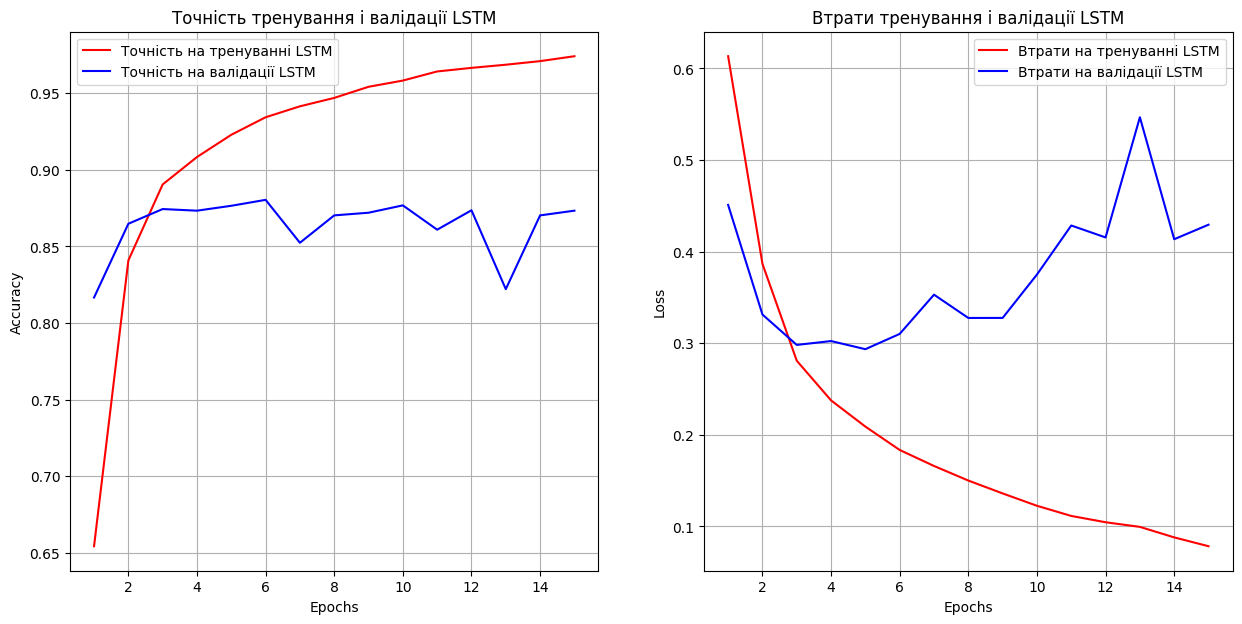

In [37]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [38]:
predict_and_evaluate(model, x_test, y_test)

782/782 [==============================] - 6s 7ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 7s 8ms/step - loss: 0.3102 - acc: 0.8742
Test Loss: 0.3102424740791321
Test Accuracy: 0.8741999864578247


## BRNN

In [39]:
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 30
model_type = 'BRNN'
model, model_name = build_model(model_type)
history = train_model(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'brnn_history.pkl')

Model: "BRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
137/137 [==============================] - 17s 102ms/step - loss: 0.6388 - acc: 0.6275 - val_loss: 0.5053 - val_acc: 0.7580
Epoch 2/30
137/137 [==============================] - 10s 76ms/step - loss: 0.4028 - acc:

In [40]:
model_name = 'BRNN'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [41]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні BRNN')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації BRNN')
    plt.title('Точність тренування і валідації BRNN')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні BRNN')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації BRNN')
    plt.title('Втрати тренування і валідації BRNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


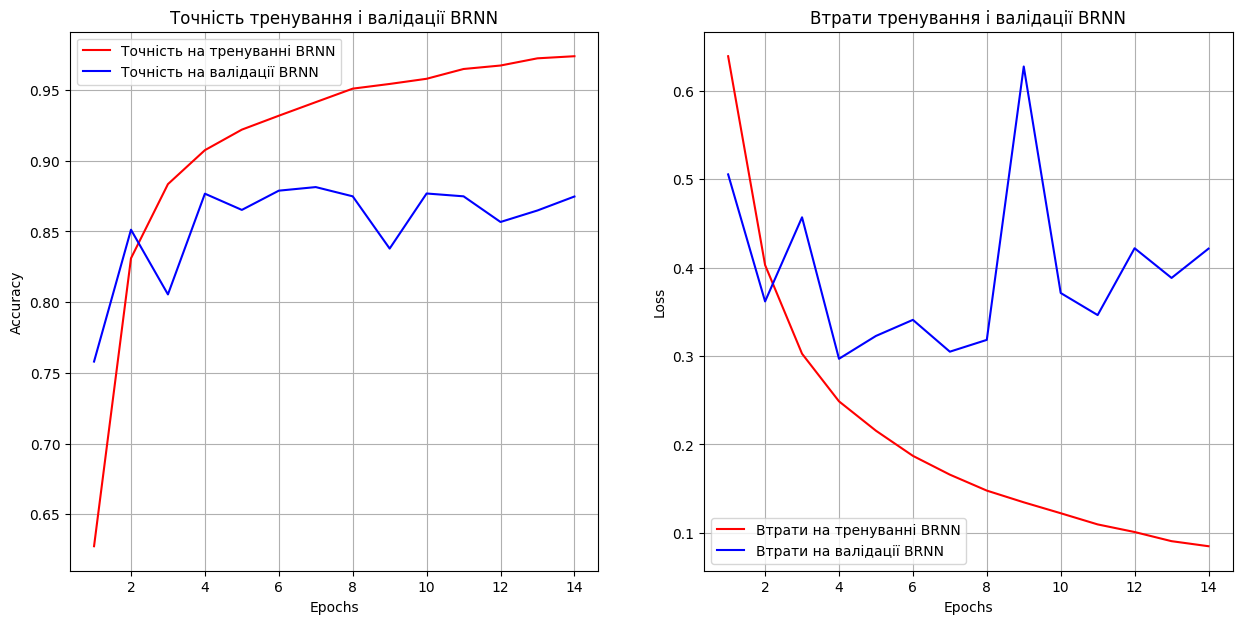

In [42]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [43]:
predict_and_evaluate(model, x_test, y_test)

782/782 [==============================] - 11s 14ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 14s 18ms/step - loss: 0.3060 - acc: 0.8730
Test Loss: 0.30596664547920227
Test Accuracy: 0.8729599714279175


# Висновок по першому розділу

При першому розгляді моделей з RNN, LSTM, GRU, BRNN,
32 нейрони
batch size 128
epoch 30 earling stop
optimizer='rmsprop'

явно видно, модель дуже далека від ідеальної і потребує доопрацювання
на графіках це добре видно, під час навчання модель веде себе нормально, на тестових значеннях втрати зростають а точність падає.
Є кілька можливих причин:

Перенавчання (Overfitting): Модель може бути перенавчена, тобто вона дуже добре вивчила тренувальні дані, але не може узагальнити знання на тестові дані. Це може статися, якщо модель має занадто багато параметрів або якщо ви використовуєте надто велику кількість епох навчання.

Недостатня регуляризація: Відсутність або недостатня регуляризація може призвести до перенавчання моделі. Регуляризація допомагає запобігти перенавчанню, зменшуючи значення параметрів моделі або додаючи обмеження до їх значень.

Неправильно обрані гіперпараметри: Можливо, обрані значення гіперпараметрів моделі (наприклад, розмір батча, кількість нейронів, кількість епох тощо) не є оптимальними для вашої проблеми.

Нестабільність моделі: Деякі алгоритми навчання, особливо при використанні навчання на довгих епохах або з великою кількістю параметрів, можуть стати нестабільними і призвести до стрибків у втраті та точності.

Для вирішення цієї проблеми ми будемо робити наступне:

1. Змінювати кількість епох навчання.
2. Додамо регуляризацію, наприклад, dropout або L2 регуляризацію.
3. Змінювати параметри навчання, такі як розмір батча, швидкість навчання, функція оптимізації.


# Другий розділ
При першому розгляді моделей з RNN, LSTM
16 нейронів batch size 128 epoch 30 earling stop optimizer='adam'

Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

##RNN  16 нейронів 128 batch size, Adam

In [44]:
from keras import regularizers

def build_model_upd(model_type):
    model = Sequential(name=model_type)
    model.add(Embedding(max_features, 16))

    if model_type == 'RNN':
        model.add(SimpleRNN(16, kernel_regularizer=regularizers.l2(0.01)))
    elif model_type == 'LSTM':
        model.add(LSTM(16, kernel_regularizer=regularizers.l2(0.01)))
    elif model_type == 'BRNN':
        model.add(Bidirectional(LSTM(16, kernel_regularizer=regularizers.l2(0.01))))
    elif model_type == 'GRU':
        model.add(GRU(16, kernel_regularizer=regularizers.l2(0.01)))

    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model, model_type


In [45]:
import keras
from keras import optimizers

def train_model_upd(model, model_name, x_train, y_train, epochs=10, batch_size=32, learning_rate=0.001):
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    model.reset_states()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.3, callbacks=[early_stopping])
    results[model_name] = history.history
    model.save(f"{model_name}_model_upd.h5")
    return history


In [46]:
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 30
model_type = 'RNN'
model, model_name = build_model_upd(model_type)
history = train_model_upd(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'rnn_upd_history.pkl')

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          160000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160545 (627.13 KB)
Trainable params: 160545 (627.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
137/137 [==============================] - 82s 582ms/step - loss: 0.7741 - acc: 0.6377 - val_loss: 0.6416 - val_acc: 0.7817
Epoch 2/30
137/137 [==============================] - 74s 542ms/step - loss: 0.6952 - acc: 0.7069 - val_loss: 0.5765 - val_acc: 0.8369
Epoch 3/30
137/13

In [47]:
model_name = 'RNN'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [48]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні RNN')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації RNN')
    plt.title('Точність тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні RNN')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації RNN')
    plt.title('Втрати тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


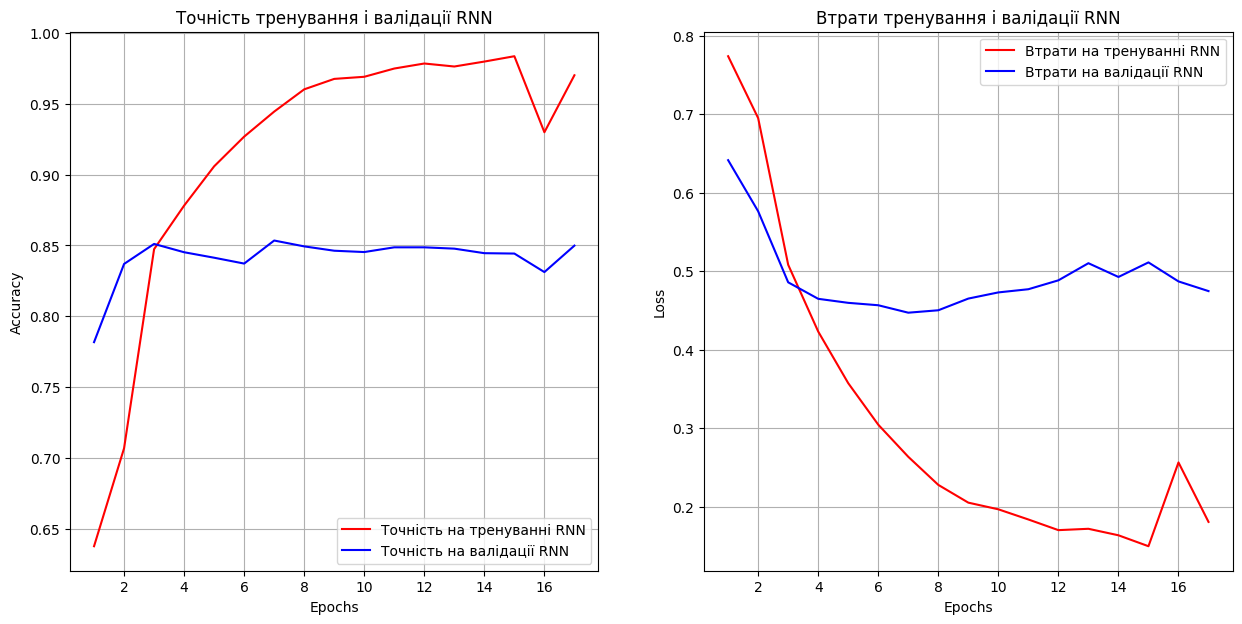

In [49]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [50]:
predict_and_evaluate(model, x_test, y_test)

782/782 [==============================] - 29s 37ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 34s 43ms/step - loss: 0.4607 - acc: 0.8452
Test Loss: 0.46071651577949524
Test Accuracy: 0.8452399969100952


Точність покращилась, але є момент перенавчання

## LSTM 16 нейронів 128 batch size, Adam

In [51]:
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 30
model_type = 'LSTM'
model, model_name = build_model_upd(model_type)
history = train_model_upd(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'lstm_upd_history.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 16)          160000    
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 162129 (633.32 KB)
Trainable params: 162129 (633.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
137/137 [==============================] - 18s 117ms/step - loss: 0.7826 - acc: 0.6505 - val_loss: 0.5452 - val_acc: 0.8361
Epoch 2/30
137/137 [==============================] - 13s 95ms/step - loss: 0.4711 - acc: 0.8457 - val_loss: 0.4787 - val_acc: 0.8203
Epoch 3/30
137/13

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 6s 8ms/step - loss: 0.3983 - acc: 0.8640
Файл моделей ./LSTM_models.pkl вже існує. Перезаписуємо.
Файл історії ./LSTM_history.pkl вже існує. Перезаписуємо.
Файл результатів ./LSTM_results.pkl вже існує. Перезаписуємо.


In [52]:
model_name = 'LSTM'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [53]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


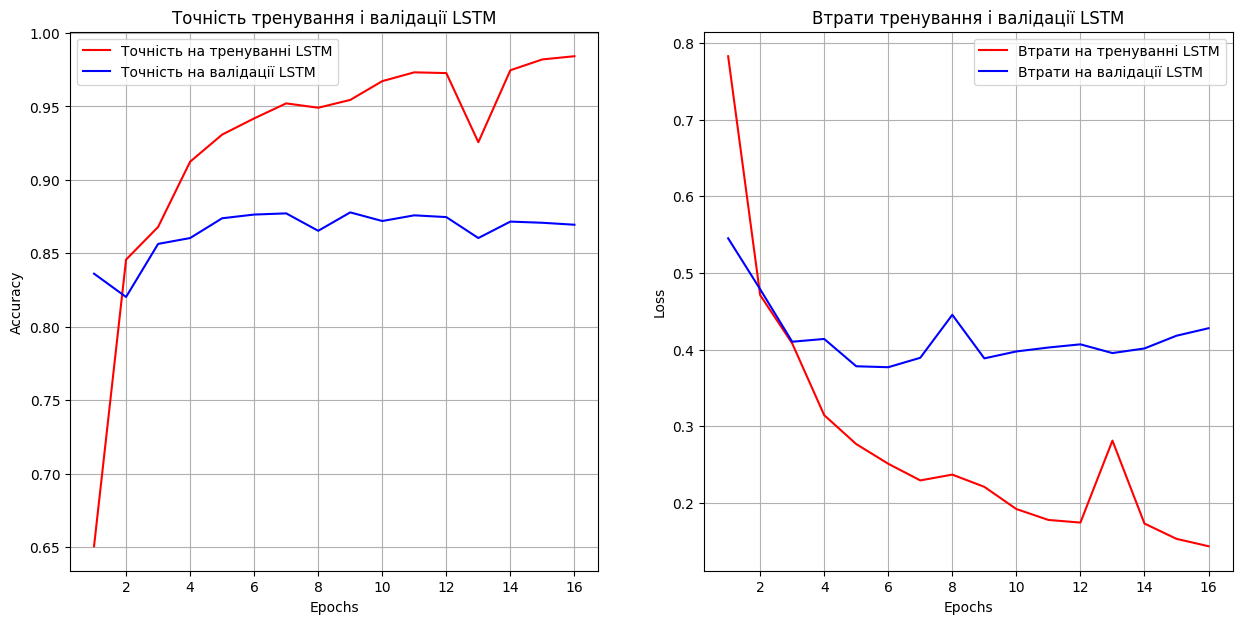

In [54]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [55]:
max_features = 10000
maxlen = 500
batch_size = 256
epochs = 30
model_type = 'LSTM'
model, model_name = build_model_upd(model_type)
history = train_model_upd(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'lstm_upd_256_history.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          160000    
                                                                 
 lstm_3 (LSTM)               (None, 16)                2112      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 162129 (633.32 KB)
Trainable params: 162129 (633.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
69/69 [==============================] - 16s 206ms/step - loss: 0.8753 - acc: 0.5589 - val_loss: 0.7968 - val_acc: 0.5509
Epoch 2/30
69/69 [==============================] - 11s 153ms/step - loss: 0.7172 - acc: 0.7163 - val_loss: 0.5908 - val_acc: 0.8031
Epoch 3/30
69/69 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 7s 8ms/step - loss: 0.4120 - acc: 0.8537
Файл моделей ./LSTM_models.pkl вже існує. Перезаписуємо.
Файл історії ./LSTM_history.pkl вже існує. Перезаписуємо.
Файл результатів ./LSTM_results.pkl вже існує. Перезаписуємо.


In [56]:
model_name = 'LSTM'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [57]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


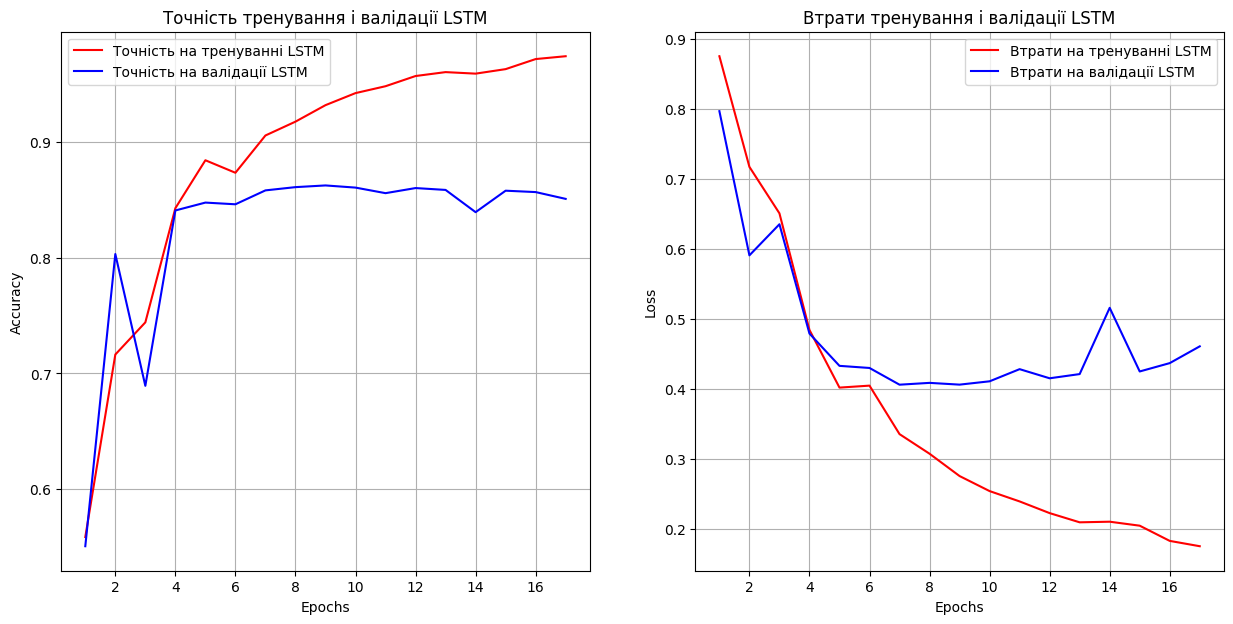

In [58]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [59]:
max_features = 10000
maxlen = 500
batch_size = 512
epochs = 30
model_type = 'LSTM'
model, model_name = build_model_upd(model_type)
history = train_model_upd(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'lstm_upd_512_history.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 16)          160000    
                                                                 
 lstm_4 (LSTM)               (None, 16)                2112      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 162129 (633.32 KB)
Trainable params: 162129 (633.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
35/35 [==============================] - 11s 219ms/step - loss: 0.9349 - acc: 0.5589 - val_loss: 0.8761 - val_acc: 0.6740
Epoch 2/30
35/35 [==============================] - 6s 166ms/step - loss: 0.7954 - acc: 0.7250 - val_loss: 0.7217 - val_acc: 0.7717
Epoch 3/30
35/35 [===

In [60]:
model_name = 'LSTM'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [61]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


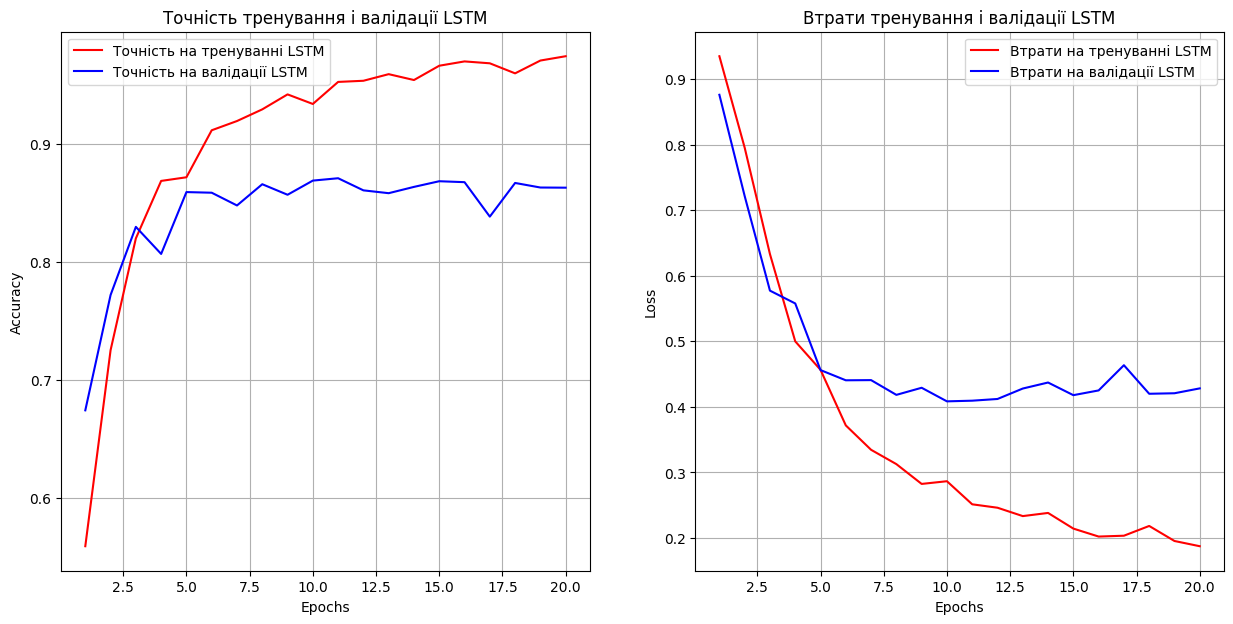

In [62]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

# LSTM 16 нейронів 512 batch size, Adam 12 epochs

In [63]:
max_features = 10000
maxlen = 500
batch_size = 512
epochs = 12
model_type = 'LSTM'
model, model_name = build_model_upd(model_type)
history = train_model_upd(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'lstm_upd_512_history.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 16)          160000    
                                                                 
 lstm_5 (LSTM)               (None, 16)                2112      
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 162129 (633.32 KB)
Trainable params: 162129 (633.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/12
35/35 [==============================] - 9s 141ms/step - loss: 0.9122 - acc: 0.5795 - val_loss: 0.8678 - val_acc: 0.5565
Epoch 2/12
35/35 [==============================] - 5s 135ms/step - loss: 0.8121 - acc: 0.6526 - val_loss: 0.7315 - val_acc: 0.7923
Epoch 3/12
35/35 [====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 7s 9ms/step - loss: 0.4247 - acc: 0.8524
Файл моделей ./LSTM_models.pkl вже існує. Перезаписуємо.
Файл історії ./LSTM_history.pkl вже існує. Перезаписуємо.
Файл результатів ./LSTM_results.pkl вже існує. Перезаписуємо.


In [64]:
model_name = 'LSTM'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [65]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


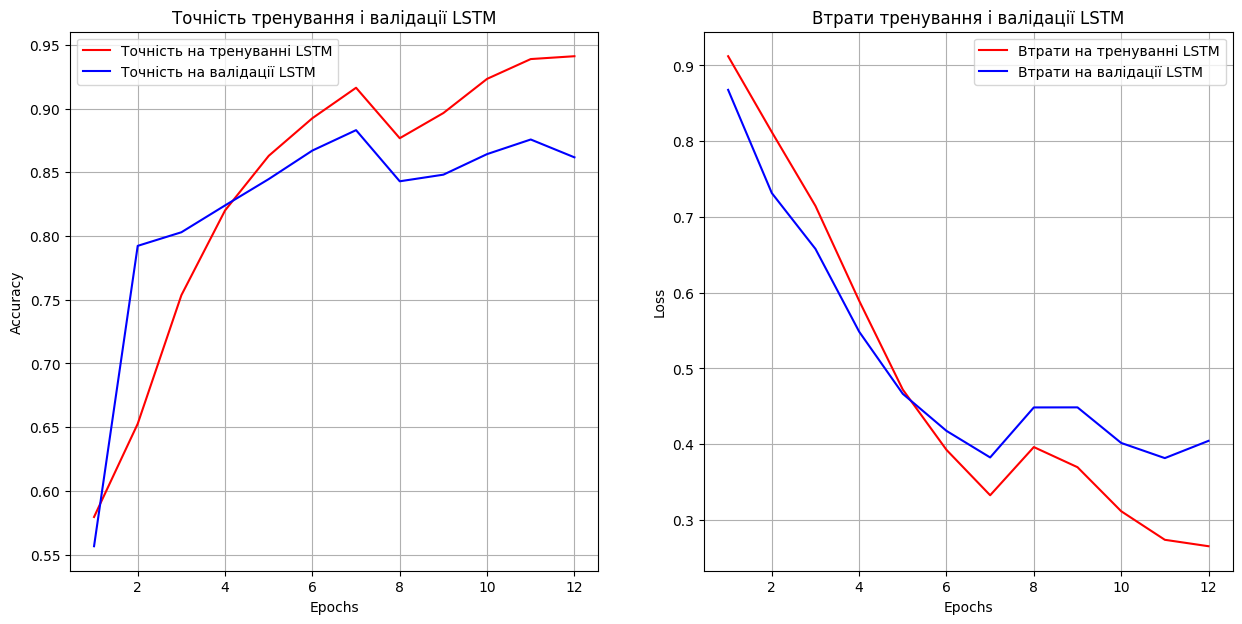

In [66]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [67]:
from keras import regularizers

def build_model_upd_1(model_type):
    model = Sequential(name=model_type)
    model.add(Embedding(max_features, 16))

    if model_type == 'RNN':
        model.add(SimpleRNN(16, kernel_regularizer=regularizers.l2(0.01)))
    elif model_type == 'LSTM':
        model.add(LSTM(16, kernel_regularizer=regularizers.l2(0.01)))
    elif model_type == 'BRNN':
        model.add(Bidirectional(LSTM(16, kernel_regularizer=regularizers.l2(0.01))))
    elif model_type == 'GRU':
        model.add(GRU(16, kernel_regularizer=regularizers.l2(0.01)))

    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model, model_type


In [68]:
import keras
from keras import optimizers

def train_model_upd_1(model, model_name, x_train, y_train, epochs=10, batch_size=16, learning_rate=0.0001):
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    model.reset_states()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.3, callbacks=[early_stopping])
    results[model_name] = history.history
    model.save(f"{model_name}_model_upd.h5")
    return history

## RNN 512 16

In [69]:
max_features = 10000
maxlen = 500
batch_size = 512
epochs = 30
model_type = 'RNN'
model, model_name = build_model_upd_1(model_type)
history = train_model_upd_1(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'rnn_upd_history.pkl')

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 16)          160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160545 (627.13 KB)
Trainable params: 160545 (627.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
35/35 [==============================] - 21s 560ms/step - loss: 0.8965 - acc: 0.5159 - val_loss: 0.8908 - val_acc: 0.5119
Epoch 2/30
35/35 [==============================] - 19s 553ms/step - loss: 0.8842 - acc: 0.5378 - val_loss: 0.8833 - val_acc: 0.5265
Epoch 3/30
35/35 [===

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 30s 38ms/step - loss: 0.6236 - acc: 0.8222
Файл моделей ./RNN_models.pkl вже існує. Перезаписуємо.
Файл історії ./RNN_history.pkl вже існує. Перезаписуємо.
Файл результатів ./RNN_results.pkl вже існує. Перезаписуємо.


In [70]:
model_name = 'RNN'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [71]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні RNN')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації RNN')
    plt.title('Точність тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні RNN')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації RNN')
    plt.title('Втрати тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


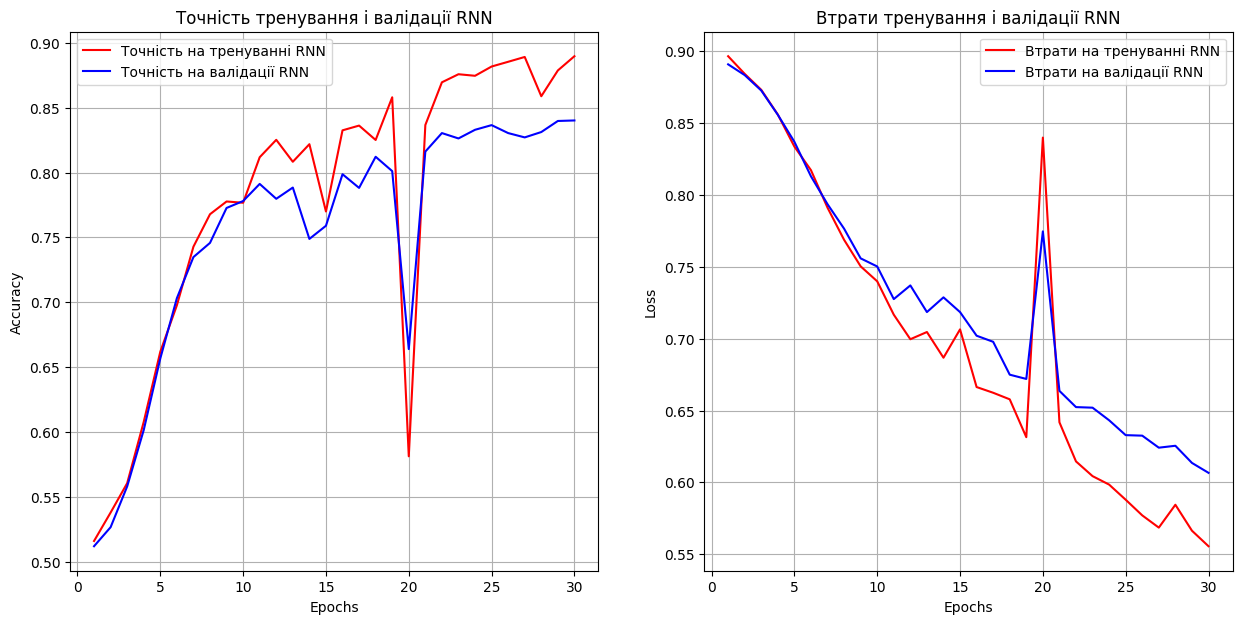

In [72]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

## LSTM

In [73]:
max_features = 10000
maxlen = 500
batch_size = 512
epochs = 30
model_type = 'LSTM'
model, model_name = build_model_upd_1(model_type)
history = train_model_upd_1(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

import pickle

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'rnn_upd_history.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 16)          160000    
                                                                 
 lstm_6 (LSTM)               (None, 16)                2112      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 162129 (633.32 KB)
Trainable params: 162129 (633.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
35/35 [==============================] - 8s 132ms/step - loss: 0.9668 - acc: 0.5191 - val_loss: 0.9614 - val_acc: 0.5248
Epoch 2/30
35/35 [==============================] - 4s 108ms/step - loss: 0.9563 - acc: 0.5486 - val_loss: 0.9512 - val_acc: 0.5420
Epoch 3/30
35/35 [====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 7s 8ms/step - loss: 0.6809 - acc: 0.7670
Файл моделей ./LSTM_models.pkl вже існує. Перезаписуємо.
Файл історії ./LSTM_history.pkl вже існує. Перезаписуємо.
Файл результатів ./LSTM_results.pkl вже існує. Перезаписуємо.


In [74]:
model_name = 'LSTM'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [75]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


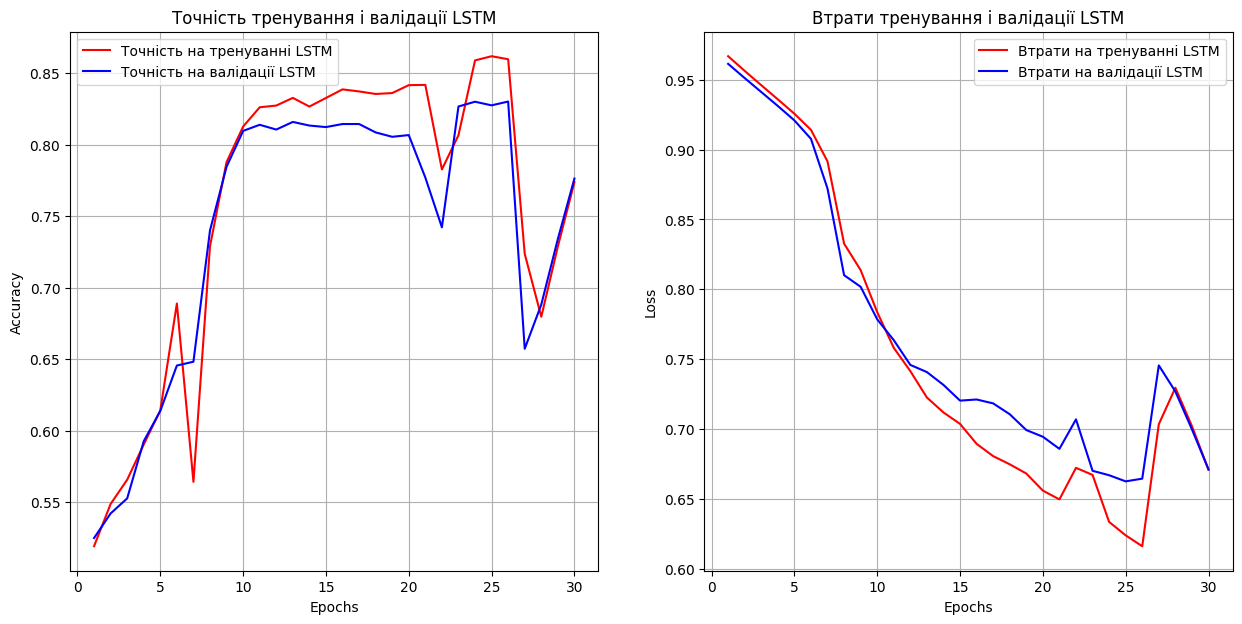

In [76]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

# 50 epochs

In [77]:
import os
import pickle

def load_history(model_name, base_dir='./'):
    history_filename = base_dir + model_name + '_history.pkl'

    if not os.path.exists(history_filename):
        print(f"Файл історії {history_filename} не існує.")
        return None

    with open(history_filename, 'rb') as f:
        history = pickle.load(f)
    return history

In [78]:
from keras.layers import Dropout
from keras import optimizers

def build_model_upd_2(model_type):
    model = Sequential(name=model_type)
    model.add(Embedding(max_features, 32))
    model.add(Dropout(0.2))
    if model_type == 'RNN':
        model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01)))
    elif model_type == 'LSTM':
        model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model, model_type


In [79]:
import keras
from keras.callbacks import EarlyStopping

def train_model_upd_2(model, model_name, x_train, y_train, epochs=10, batch_size=32, learning_rate=0.0001, dropout_rate=0.2, verbose=1):
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    model.reset_states()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    for layer in model.layers:
        if isinstance(layer, keras.layers.Dropout):
            layer.rate = dropout_rate
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.3, callbacks=[early_stopping], verbose=verbose)
    results[model_name] = history.history
    model.save(f"{model_name}_model_upd_2.h5")
    return history


In [80]:
import pickle
import keras
from keras import regularizers
max_features = 10000
maxlen = 500
batch_size = 512
epochs = 50
model_type = 'LSTM'
model, model_name = build_model_upd_2(model_type)
history = train_model_upd_2(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'lstm_history.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          320000    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
35/35 [========

In [81]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні RNN')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації RNN')
    plt.title('Точність тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні RNN')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації RNN')
    plt.title('Втрати тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()



In [82]:
model_name = 'LSTM'
history = load_history(model_name)
if history:
    print("Історія завантажена успішно!")
else:
    print("Помилка при завантаженні історії.")

Історія завантажена успішно!


In [83]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


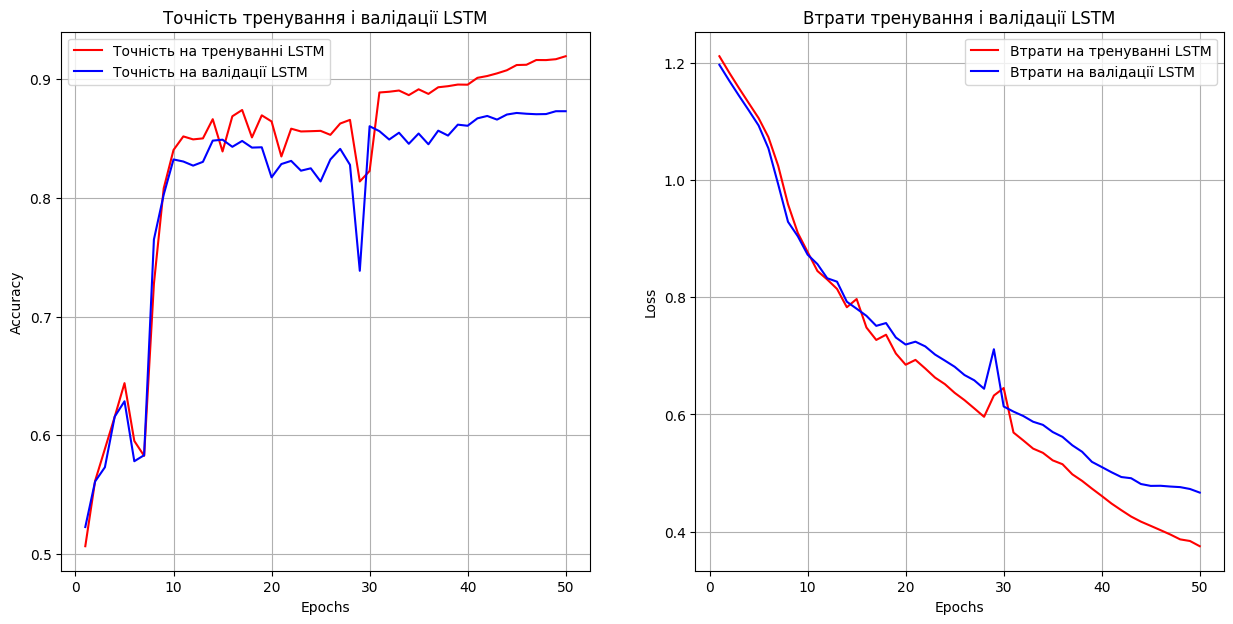

In [84]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [85]:
predict_and_evaluate(model, x_test, y_test)

782/782 [==============================] - 7s 7ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 7s 9ms/step - loss: 0.4960 - acc: 0.8593
Test Loss: 0.4959837794303894
Test Accuracy: 0.859279990196228


# 32 нейрони 2 шари LSTM, LSTM 50epochs

In [86]:
from keras.layers import Dropout
from keras import optimizers

def build_model_upd_3(model_type):
    model = Sequential(name=model_type)
    model.add(Embedding(max_features, 32))
    model.add(Dropout(0.2))
    if model_type == 'RNN':
        model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01)))
    elif model_type == 'LSTM':
        model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2, return_sequences=True))
        model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model, model_type


In [87]:
import keras
from keras.callbacks import EarlyStopping

def train_model_upd_3(model, model_name, x_train, y_train, epochs=10, batch_size=32, learning_rate=0.0001, dropout_rate=0.2, verbose=1, patience=10):
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)

    model.reset_states()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    for layer in model.layers:
        if isinstance(layer, keras.layers.Dropout):
            layer.rate = dropout_rate
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.3, callbacks=[early_stopping], verbose=verbose)
    results[model_name] = history.history
    model.save(f"{model_name}_model_upd_3.h5")
    return history


In [ ]:
import pickle
import keras
from keras import regularizers
max_features = 10000
maxlen = 500
batch_size = 256
epochs = 50
model_type = 'LSTM'
model, model_name = build_model_upd_3(model_type)
history = train_model_upd_3(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'lstm_history_3.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 32)          320000    
                                                                 
 dropout_2 (Dropout)         (None, None, 32)          0         
                                                                 
 lstm_8 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_9 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 

In [ ]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


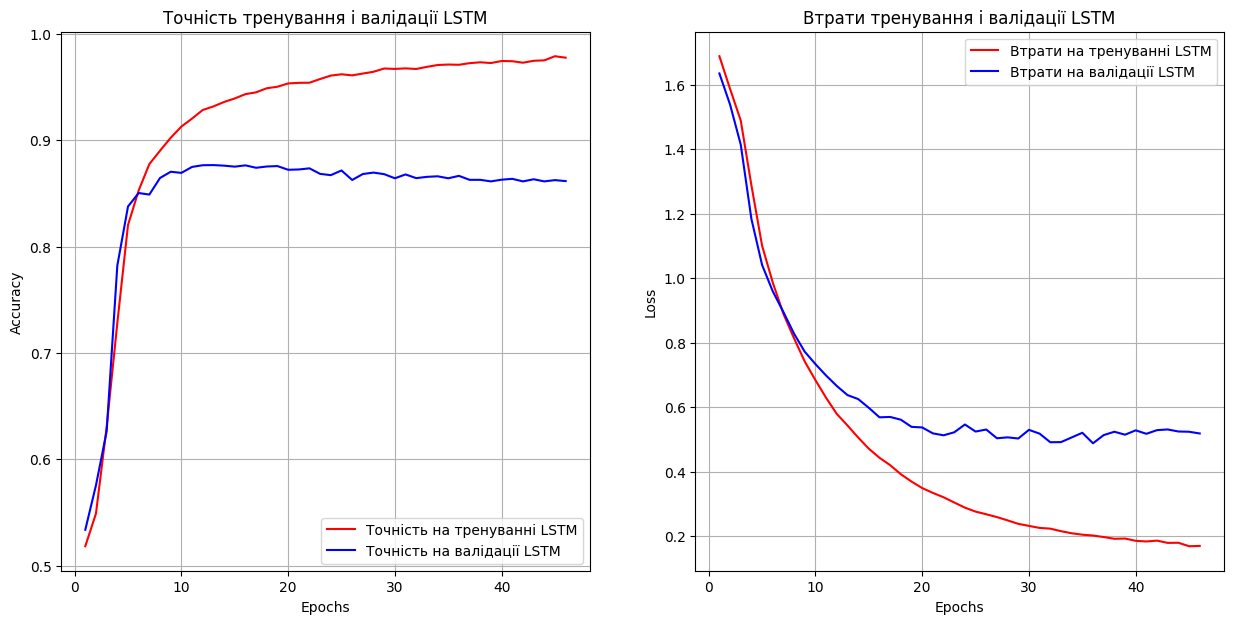

In [ ]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

Висновок - будемо вважати, що ця модель веде себе трохи краще ніж попередні


## LSTM

In [ ]:
def build_model_upd_4(model_type):
    model = Sequential(name=model_type)
    model.add(Embedding(max_features, 32))
    model.add(Dropout(0.2))
    if model_type == 'RNN':
        model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2, return_sequences=True))
        model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2))
    elif model_type == 'LSTM':
        model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2, return_sequences=True))
        model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model, model_type


In [ ]:
import keras
from keras.callbacks import EarlyStopping

def train_model_upd_4(model, model_name, x_train, y_train, epochs=10, batch_size=32, learning_rate=0.0001, dropout_rate=0.2, verbose=1, patience=10):
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)

    model.reset_states()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    for layer in model.layers:
        if isinstance(layer, keras.layers.Dropout):
            layer.rate = dropout_rate
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.3, callbacks=[early_stopping], verbose=verbose)
    results[model_name] = history.history
    model.save(f"{model_name}_model_upd_4.h5")
    return history


In [ ]:
import pickle
import keras
from keras import regularizers
max_features = 10000
maxlen = 500
batch_size = 256
epochs = 50
model_type = 'LSTM'
model, model_name = build_model_upd_4(model_type)
history = train_model_upd_4(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'lstm_history_4.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm (LSTM)                 (None, None, 32)          8320      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 101s 130ms/step - loss: 0.5244 - acc: 0.8540


In [ ]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


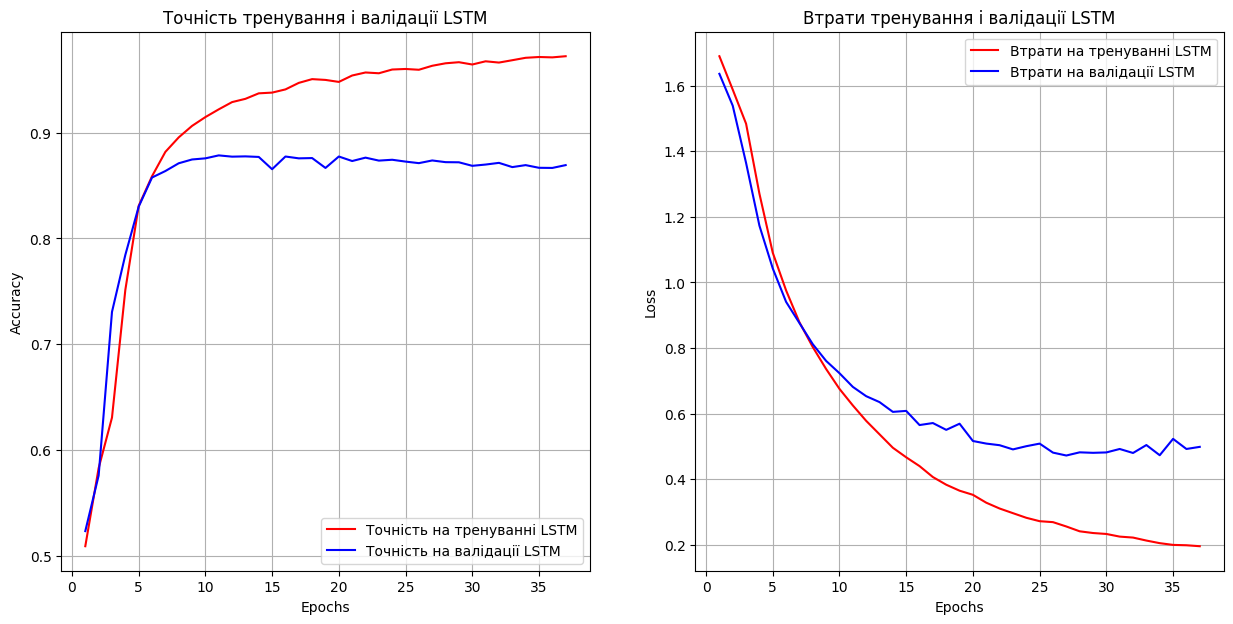

In [ ]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [ ]:
predict_and_evaluate(model, x_test, y_test)

782/782 [==============================] - 113s 144ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 105s 135ms/step - loss: 0.5244 - acc: 0.8540
Test Loss: 0.5244432091712952
Test Accuracy: 0.8539599776268005


In [ ]:
import pickle
import keras
from keras import regularizers
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 50
model_type = 'RNN'
model, model_name = build_model_upd_4(model_type)
history = train_model_upd_4(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'rnn_history_4.pkl')

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout_2 (Dropout)         (None, None, 32)          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 32)          2080      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 324193 (1.24 MB)
Trainable params: 324193 (1.24 M

In [ ]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні RNN')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації RNN')
    plt.title('Точність тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні RNN')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації RNN')
    plt.title('Втрати тренування і валідації RNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


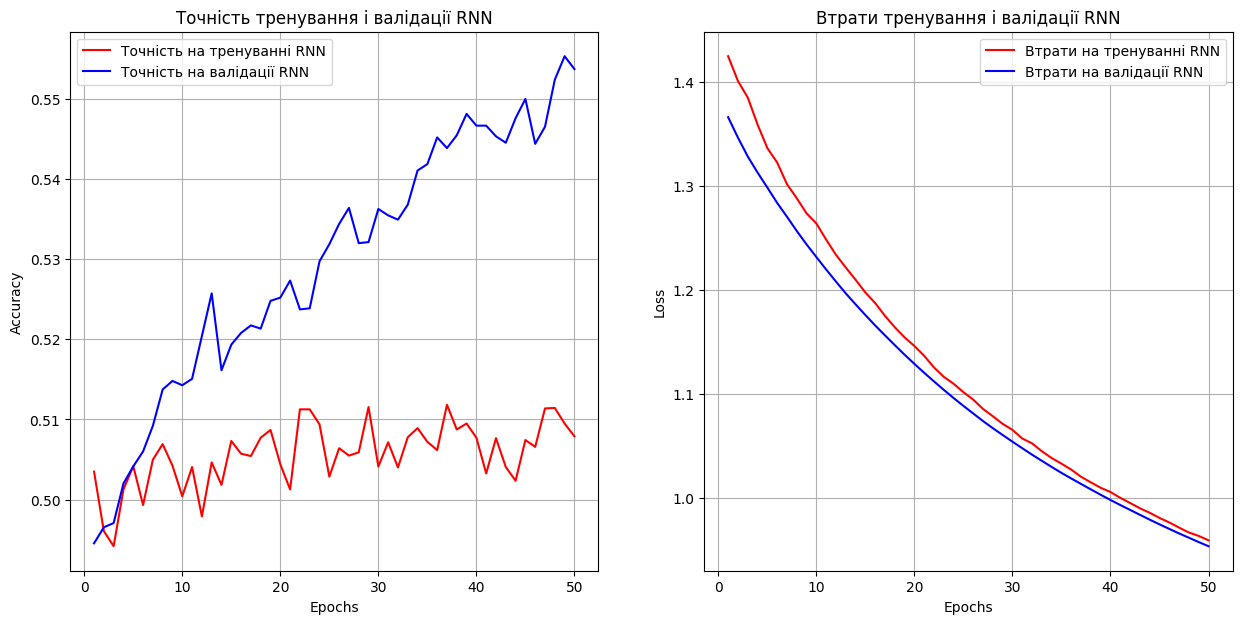

In [ ]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

За результатами навчання моделі RNN з двома шарами SimpleRNN та додатковими Dropout шарами, ми маємо такі показники:

Після 50 епох навчання ми спостерігаємо, що функція втрат (loss) на навчальних та валідаційних даних зменшилася з 1.4245 до 0.9596 на навчальних даних та з 1.3659 до 0.9539 на валідаційних даних. Це свідчить про те, що модель навчилася, та функція втрат зменшилася протягом навчання.

Щодо точності (accuracy), на останній епохі вона складає 50.79% на навчальних даних та 55.85% на валідаційних даних.
процес не заверщшений, можливо треба більше епох, або міняти параметри

## ADAMAX LSTM

In [ ]:
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras import optimizers

def build_model_upd_5(model_type):
    model = Sequential(name=model_type)
    model.add(Embedding(max_features, 32))
    model.add(Dropout(0.2))
    if model_type == 'RNN':
        model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2, return_sequences=True))
        model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01)))
    elif model_type == 'LSTM':
        model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2, return_sequences=True))
        model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = optimizers.Adamax()

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model, model_type


In [ ]:
import keras
from keras.callbacks import EarlyStopping

def train_model_upd_5(model, model_name, x_train, y_train, epochs=10, batch_size=32, learning_rate=0.0001, dropout_rate=0.2, verbose=1, patience=10):
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)

    model.reset_states()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    for layer in model.layers:
        if isinstance(layer, keras.layers.Dropout):
            layer.rate = dropout_rate
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.3, callbacks=[early_stopping], verbose=verbose)
    results[model_name] = history.history
    model.save(f"{model_name}_model_upd_5.h5")
    return history


In [ ]:
import pickle
import keras
from keras import regularizers
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 50
model_type = 'LSTM'
model, model_name = build_model_upd_5(model_type)
history = train_model_upd_5(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'lstm_history_5.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout_4 (Dropout)         (None, None, 32)          0         
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 101s 129ms/step - loss: 0.4791 - acc: 0.8578
Файл моделей ./LSTM_models.pkl вже існує. Перезаписуємо.
Файл історії ./LSTM_history.pkl вже існує. Перезаписуємо.
Файл результатів ./LSTM_results.pkl вже існує. Перезаписуємо.


In [ ]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


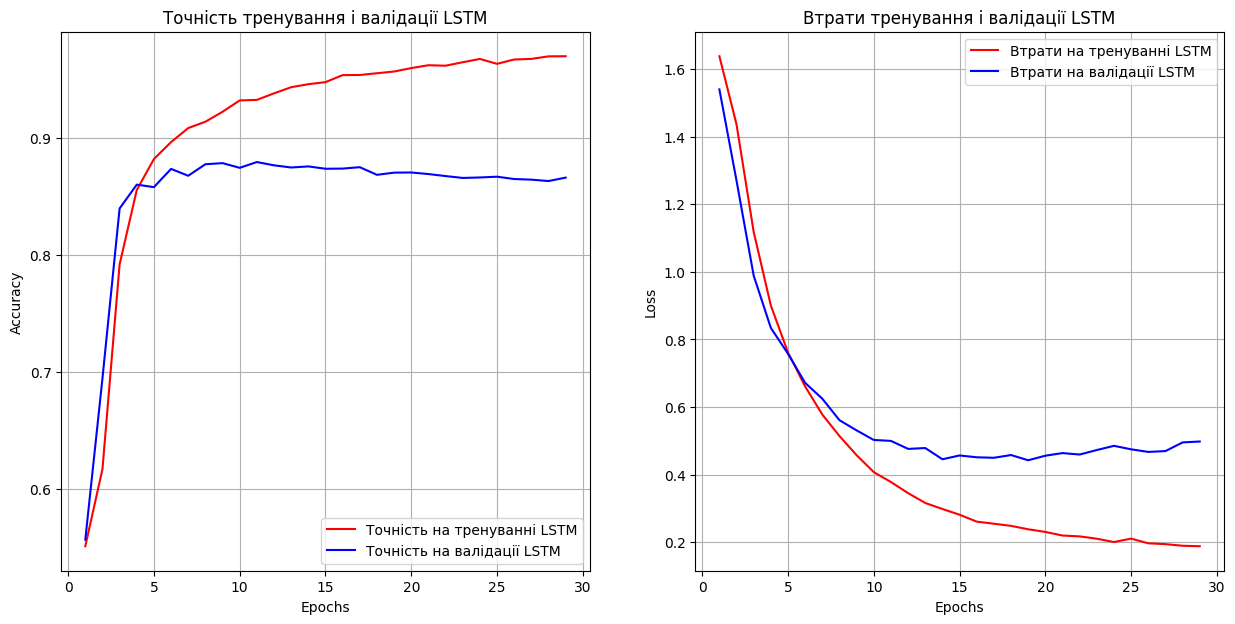

In [ ]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

Висновок

з Adamax результат досягається менше ніж за 30 епох, коли з Adam за більше епох.
час обробки епохи 192 сек проти 140 більше на 50 сек. отже Adam краще бо реально віно потратив менше часу на пару епох, але в цілому можна приймати обидва оптимізатора.
З RNN тпрохи складніше

In [ ]:
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras import optimizers

def build_model_upd_7(model_type):
    model = Sequential(name=model_type)
    model.add(Embedding(max_features, 32))
    model.add(Dropout(0.2))
    if model_type == 'RNN':
        model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2, return_sequences=True))
        model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01)))
    elif model_type == 'LSTM':
        model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(32, kernel_regularizer=regularizers.l2(0.01), recurrent_dropout=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

    optimizer = optimizers.Adamax(32)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model, model_type

In [ ]:
import pickle
import keras
from keras import regularizers
max_features = 10000
maxlen = 500
batch_size = 128
epochs = 50
model_type = 'LSTM'
model, model_name = build_model_upd_7(model_type)
history = train_model_upd_5(model, model_name, x_train, y_train, epochs=epochs, batch_size=batch_size)
models[model_name] = model
histories[model_name] = history.history
results[model_name] = evaluate_model(model, x_test, y_test)
save_models_history_results(models, histories, results, model_name)

def save_history(history, filename):
    with open(filename, 'wb') as file:
        pickle.dump(history.history, file)
save_history(history, 'lstm_history_5.pkl')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 32)          320000    
                                                                 
 dropout_18 (Dropout)        (None, None, 32)          0         
                                                                 
 lstm_4 (LSTM)               (None, None, 32)          8320      
                                                                 
 dropout_19 (Dropout)        (None, None, 32)          0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 109s 139ms/step - loss: 0.4636 - acc: 0.8569
Файл моделей ./LSTM_models.pkl вже існує. Перезаписуємо.
Файл історії ./LSTM_history.pkl вже існує. Перезаписуємо.
Файл результатів ./LSTM_results.pkl вже існує. Перезаписуємо.


In [ ]:
def plot_history(history):
    acc = histories[model_name]['acc']
    val_acc = histories[model_name]['val_acc']
    loss = histories[model_name]['loss']
    val_loss = histories[model_name]['val_loss']

    plt.figure(figsize=(15, 7))

    epochs = range(1, len(acc) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Точність на тренуванні LSTM')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації LSTM')
    plt.title('Точність тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Втрати на тренуванні LSTM')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації LSTM')
    plt.title('Втрати тренування і валідації LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(1)
    plt.legend()

    plt.show()

Історія завантажена успішно!


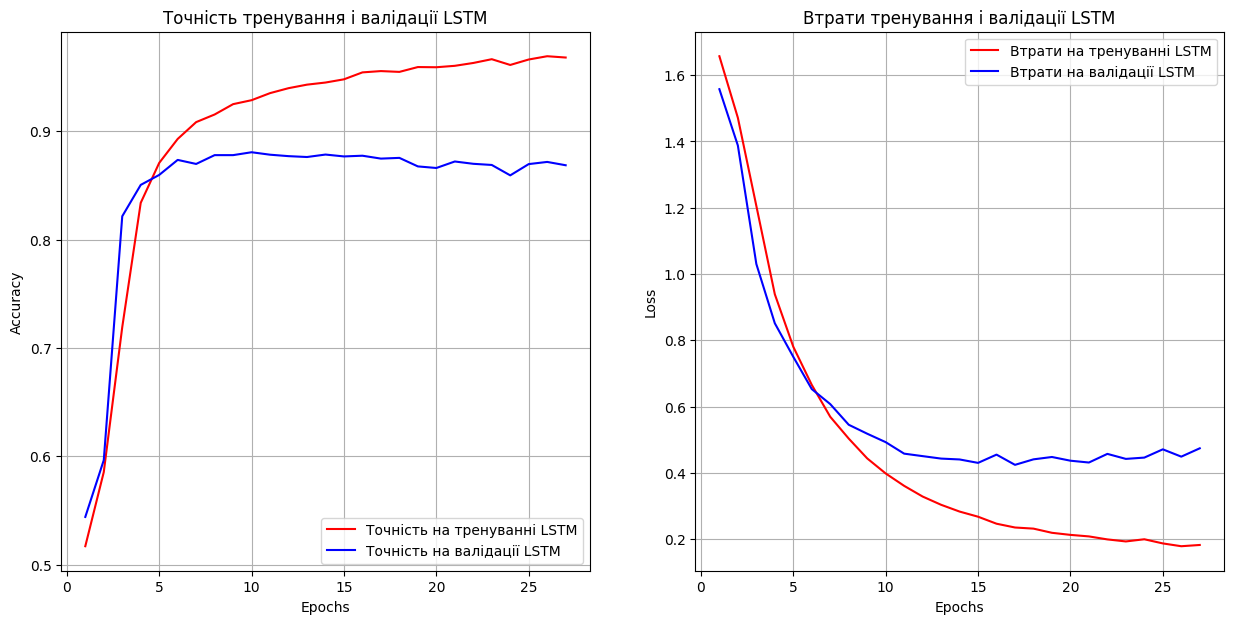

In [ ]:
history = load_history(model_name)

if history:
    print("Історія завантажена успішно!")
    plot_history(history)
else:
    print("Помилка при завантаженні історії.")

In [ ]:
predict_and_evaluate(model, x_test, y_test)

782/782 [==============================] - 104s 132ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 105s 134ms/step - loss: 0.4636 - acc: 0.8569
Test Loss: 0.46364590525627136
Test Accuracy: 0.8568800091743469


In [ ]:
print("Характеристики моделі:")
model.summary()

weights = model.get_weights()

print("\nРозмірність ваг кожного шару:")
for i, w in enumerate(weights):
    print(f"Шар {i + 1}: {w.shape}")

print("\nПриклад ваг першого шару:")
print(weights[0])

print("\nПриклад біасів першого шару:")
print(weights[1])

if model_type == 'RNN' or model_type == 'LSTM':
    print("\nПриклад матриці зв'язків першого шару:")
    print(weights[2])

sample_indices = [0, 1, 2]
print("\nПриклади вхідних даних та їх передбачень:")
for i in sample_indices:
    sample_input = x_test[i]
    sample_input_reshaped = np.expand_dims(sample_input, axis=0)
    prediction = model.predict(sample_input_reshaped)
    print(f"Приклад {i + 1}:")
    print("Вхідні дані:", sample_input)
    print("Предбачення:", prediction)


Характеристики моделі:
Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 32)          320000    
                                                                 
 dropout_18 (Dropout)        (None, None, 32)          0         
                                                                 
 lstm_4 (LSTM)               (None, None, 32)          8320      
                                                                 
 dropout_19 (Dropout)        (None, None, 32)          0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1) 

In [ ]:
import numpy as np

selected = 50

random_idx = np.random.randint(0, x_test.shape[0], size=selected)


1/1 [==============================] - 0s 336ms/step


<ipython-input-116-435c9a147164>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred = [int(model.predict(x_test[idx].reshape(1, -1))[0] > 0.5) for idx in random_idx]


1/1 [==============================] - 0s 108ms/step


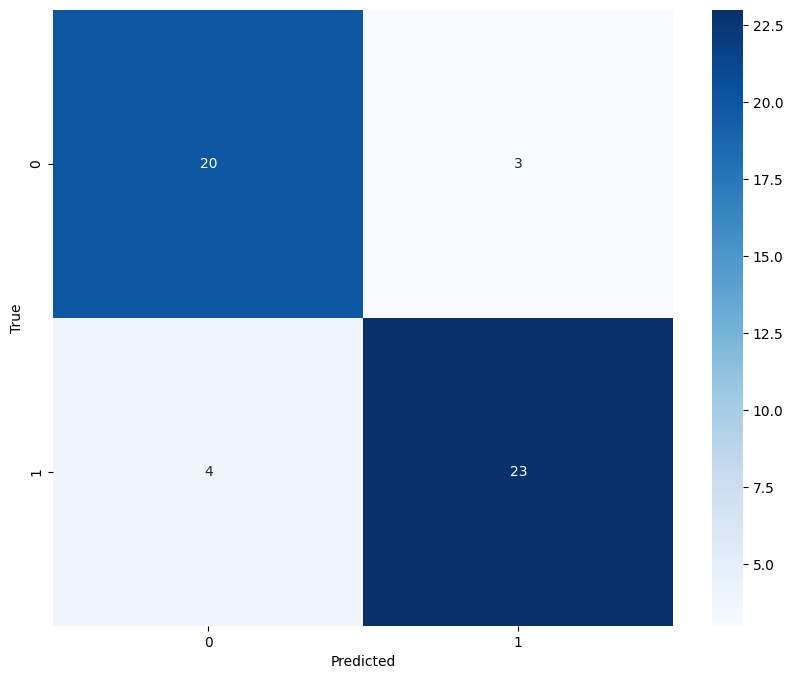

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = y_test[random_idx]

y_pred = [int(model.predict(x_test[idx].reshape(1, -1))[0] > 0.5) for idx in random_idx]

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
print("\nДекодування передбачень та справжніх значень відгуків у вигляді тексту:")
for i in sample_indices:
    sample_input = x_test[i]
    sample_input_reshaped = np.expand_dims(sample_input, axis=0)
    prediction = model.predict(sample_input_reshaped)

    decoded_review = ' '.join([reverse_word_index.get(i - 3, '') for i in sample_input if (i - 3) in reverse_word_index])

    true_label = "Positive" if y_test[i] == 1 else "Negative"

    predicted_label = "Positive" if prediction > 0.5 else "Negative"

    print(f"Приклад {i + 1}:")
    print("Відгук:", decoded_review)
    print("Справжній відгук:", true_label)
    print("Передбачення:", predicted_label)




Декодування передбачень та справжніх значень відгуків у вигляді тексту:
1/1 [==============================] - 0s 267ms/step
Приклад 1:
Відгук: please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss
Справжній відгук: Negative
Передбачення: Negative
1/1 [==============================] - 0s 235ms/step
Приклад 2:
Відгук: this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere with sexual tension and psychological it's very interesting that robert altman directed this considering the styl

## Висновок

LSTM вирішує проблему зникаючого градієнту, зберігаючи стару інформацію в стані клітини, що дозволяє використовувати її пізніше.
отримані результати дозволяють робити передбачення із точністю 85%-86%

Під час навчання глибоких рекурентних нейронних мереж (RNN) виникають дві проблеми - затухання та вибухання градієнту. Обидві проблеми пов'язані зі змінністю градієнтів під час проходження через багато шарів мережі.